<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Support Vector Machines <br>
<font color=696880 size=4>
    Ali Shafiei (shafieiali42@gmail.com) <br>
    Ali Salmani (alisalmani200149@gmail.com)

____


### Full Name :  Parishad Mokhber
### Student Number : 98100537

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

# Support Vector Machines (SVM)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [93]:
df = pd.read_csv("Liver_Disease.csv") 

### Pre-Processing

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

In [94]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [95]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [96]:
import plotly.express as px

correlation_matrix = df.loc[:, df.columns!='label'].corr()
heatmap = px.imshow(correlation_matrix)
heatmap.show()

In [97]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df["Gender"] = enc.fit_transform(df[["Gender"]])

df.head(11)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0.0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1.0,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1.0,0.7,0.2,290,53,58,6.8,3.4,1.00,1


(583, 11)
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64


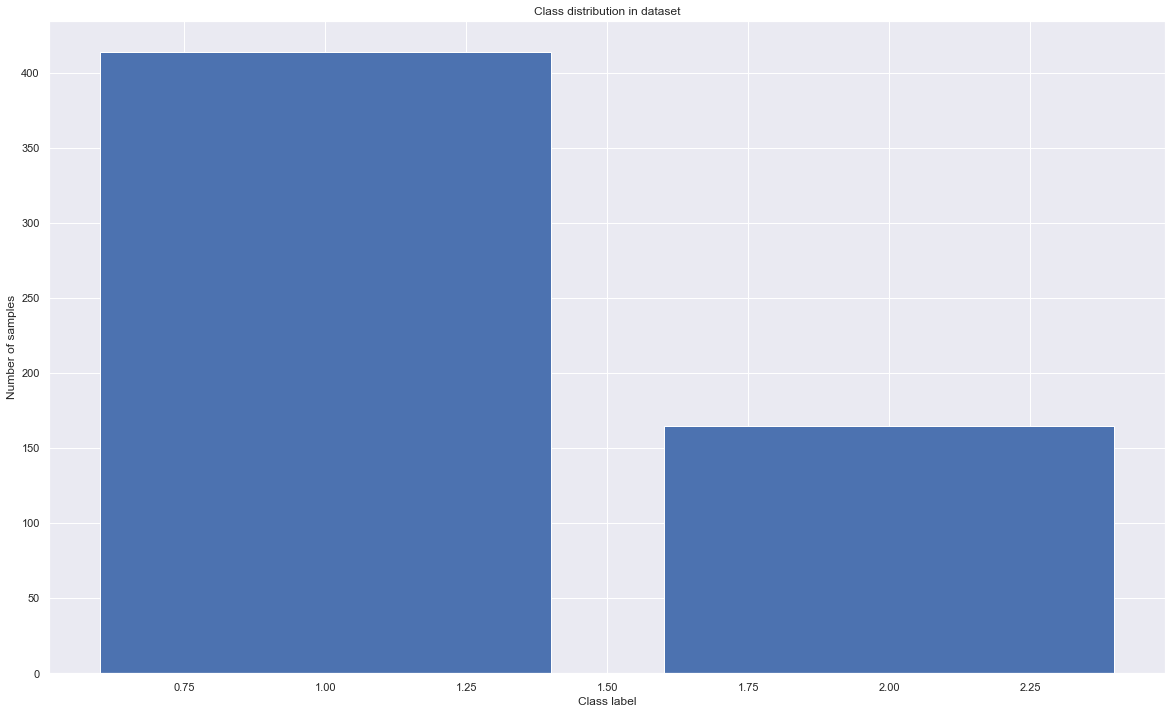

In [98]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
print(df.shape)
###############################################################################


###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
print(df.isnull().sum())
df.dropna(axis=0, inplace=True)
###############################################################################

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
unique_labels, counts = np.unique(df.label, return_counts=True)
values = [1, 100, 1000]
plt.bar(unique_labels, counts )
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()
###############################################################################

In [67]:
###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)  

In [8]:
class1 = df[df['label'] == 1]
px.histogram(df , x=class1['Age'],nbins=20)

In [9]:
px.histogram(df, x=class1['Gender'], nbins=20)

In [10]:
class2 = df[df['label'] == 2]
px.histogram(df, x=class2['Age'],nbins=20)

In [11]:
px.histogram(df , x=class2['Gender'],nbins=20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    float64
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  label                       579 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 54.3 KB


In [99]:
#change range of label to 0 and 1
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['label'] = enc.fit_transform(df[["label"]])
df['label'].sum()

165.0

In [100]:
df.shape

(579, 11)

So among 576 samples only 165 of them is label 1 so this data set is not balanced.

##### Question: What do you conclude from the plots?

The distribution of the ages is nearly the same in both classes; However, in both groups most of the samples are from men, while in a standard sampling procedure, both groups should be sampled quite the same.

Also, as stated above, this dataset is heavily imbalanced and there are a few samples of one of the classes.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

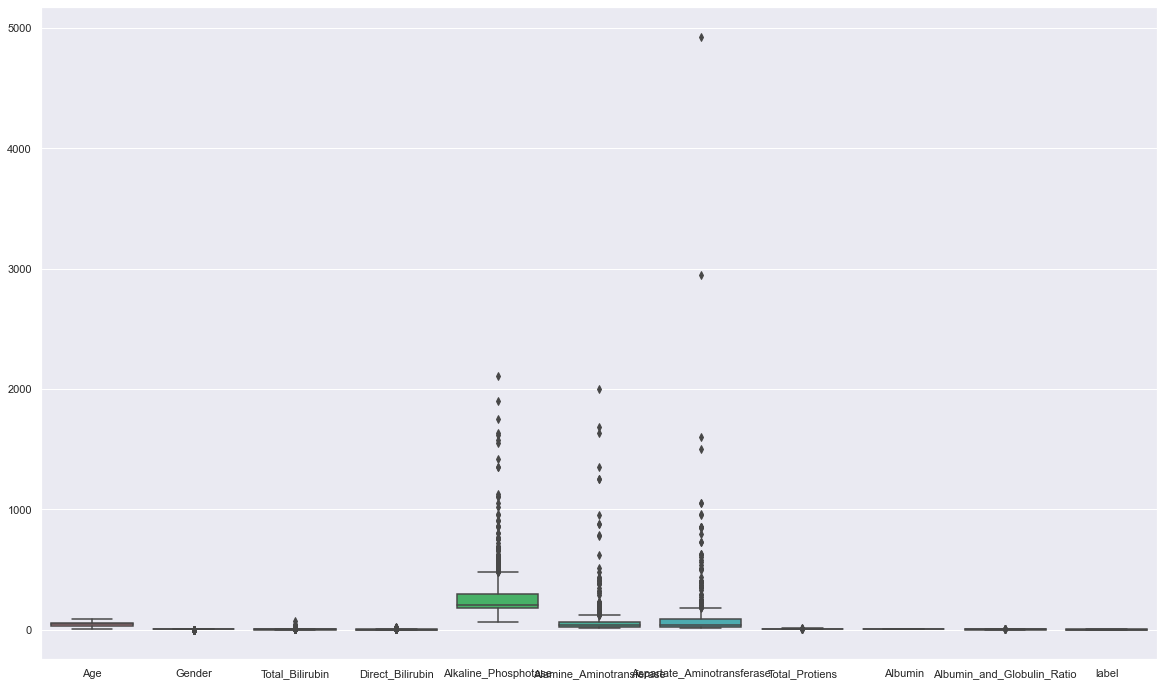

In [101]:
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df);

In [102]:
# Position of the Outlier
print(np.where(df>2500))

(array([117, 135], dtype=int64), array([6, 6], dtype=int64))


In [103]:
#drop aoutlire 
df.drop([117, 135],inplace=True)
df.drop([6, 6],inplace=True)

<AxesSubplot: >

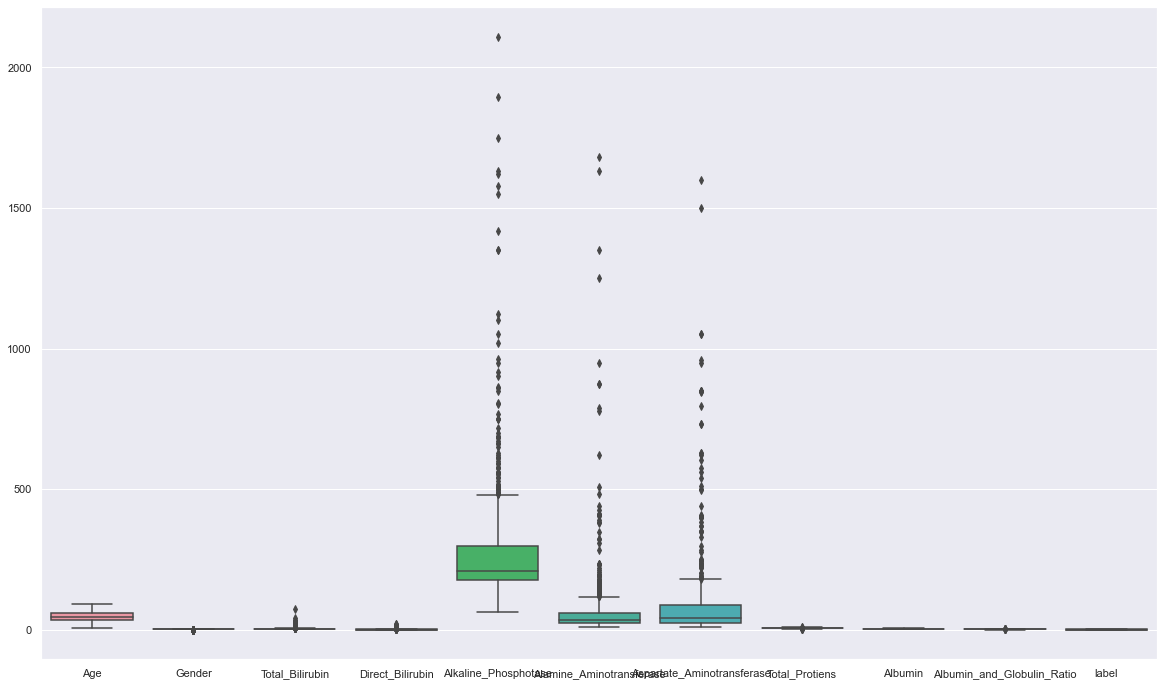

In [104]:
#new plot
sns.boxplot(data=df)

In [105]:
#new shape
df.shape

(576, 11)

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [32]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################
from sklearn import preprocessing
x_array = np.array(df.loc[:, df.columns!='label'])
normalized_df = preprocessing.normalize(x_array)
print(normalized_df)

[[0.32568286 0.         0.00350735 ... 0.03407144 0.01653467 0.00450945]
 [0.08709462 0.00140475 0.0153118  ... 0.01053564 0.00449521 0.00103952]
 [0.12343356 0.00199086 0.01453331 ... 0.01393605 0.00656985 0.00177187]
 ...
 [0.20016606 0.00384935 0.00307948 ... 0.02463582 0.01231791 0.00384935]
 [0.16172234 0.00521685 0.0067819  ... 0.03547458 0.01773729 0.00521685]
 [0.1713277  0.00450862 0.00450862 ... 0.03291295 0.01983794 0.00676294]]


In [33]:
df.loc[:, df.columns!='label'] = normalized_df

In [34]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.325683,0.000000,0.003507,0.000501,0.936965,0.080168,0.090189,0.034071,0.016535,0.004509,0.0
1,0.087095,0.001405,0.015312,0.007726,0.981922,0.089904,0.140475,0.010536,0.004495,0.001040,0.0
2,0.123434,0.001991,0.014533,0.008163,0.975523,0.119452,0.135379,0.013936,0.006570,0.001772,0.0
3,0.300939,0.005189,0.005189,0.002075,0.944325,0.072640,0.103772,0.035282,0.017641,0.005189,0.0
4,0.330364,0.004588,0.017895,0.009177,0.894736,0.123887,0.270715,0.033495,0.011012,0.001835,0.0


### SVM

#### spliting data

In [116]:
## TODO Split the data into test and training sets.
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns != 'label'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [36]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = SVC(class_weight = 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.89      0.27      0.42       122
         1.0       0.35      0.92      0.50        51

    accuracy                           0.46       173
   macro avg       0.62      0.60      0.46       173
weighted avg       0.73      0.46      0.44       173



0.4624277456647399

#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [84]:
#########################################################################################
## TODO
import warnings
warnings.filterwarnings("ignore")
#########################################################################################
from sklearn.model_selection import GridSearchCV
# define search space
cw = {0: 1, 1: 2}
space = {'C':[0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100], 
         'kernel':['poly', "rbf", 'linear'] ,
         'degree' : [2, 3, 4, 7] ,
         'class_weight' : ['balance' , cw]}
model = SVC()
search = GridSearchCV(model, space, scoring='balanced_accuracy', n_jobs=-1, cv= 5)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.662105908768104
Best Hyperparameters: {'C': 100, 'class_weight': {0: 1, 1: 2}, 'degree': 3, 'kernel': 'poly'}


Train an svm model on the entire training data using the parameters you found in the previous step.

In [86]:
#########################################################################################
## TODO
#########################################################################################
model = SVC(C=50, class_weight= {0: 1, 1: 2}, kernel= "poly", degree=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.84      0.66      0.74       122
         1.0       0.46      0.69      0.55        51

    accuracy                           0.67       173
   macro avg       0.65      0.68      0.65       173
weighted avg       0.72      0.67      0.68       173



0.6705202312138728

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

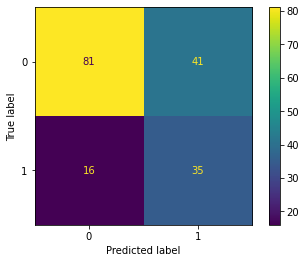

In [87]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**In the confusion matrix, as the above table suggests, true labels are compared against the predicted labels of our model. Using the entries of this matrix, we can confirm our model is facing some issue regarding the prediction of class 1. If we did not use the class weight to somehow balance our data, the model would have predicted all the test samples to be in class 0 which is not desired!**

**Also, entries of this matrix can be used to calculate some metrics such as recall, precision, accuracy and f1-score, as discussed in the class.**

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [117]:
#########################################################################################
## TODO
#########################################################################################

# creating a noise with the same dimension as the dataset
mu, sigma = 0, 0.5 
noise = np.random.normal(mu, sigma, x.shape) 
x = x + noise

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [120]:
# SVM fitting
model = SVC(C=50, class_weight= {0: 1, 1: 2}, kernel= "rbf", degree=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.86      0.57      0.69       122
         1.0       0.43      0.78      0.56        51

    accuracy                           0.64       173
   macro avg       0.65      0.68      0.62       173
weighted avg       0.74      0.64      0.65       173



0.6358381502890174

In [119]:
#Logistic Regression fitting
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       122
         1.0       0.56      0.20      0.29        51

    accuracy                           0.72       173
   macro avg       0.65      0.57      0.56       173
weighted avg       0.68      0.72      0.67       173



0.7167630057803468

As we can see, by adding a gaussian noise to our dataset, logistic regression had better results on test set. However, its recall on class 1 is very low, but generally better than SVC.